# Visualización de datos

**`plotnine` es una implementación de la gramática de gráficos en Python, está basada en `ggplot2` en R.** 

La **gramática de gráficos** permite a los usuarios componer visualizaciones de datos mediante la **asignación explícita de datos a objetos visuales** que componen la visualización.

Construir visualizaciones de datos con una gramática resulta poderoso, dado que hace que las visualizaciones personalizadas (y complejas) sean fáciles de pensar y luego crear, mientras que las visualizaciones simples siguen siendo simples.

Los componentes de la gramática de gráficos son los siguientes: 
1. **Datos***; variables de datos originales.
2. **Estética***; proporciona un mapeo entre variables de datos y atributos estéticos utilizados por el sistema de dibujo subyacente.
3. **Objetos geométricos***; define el tipo de objeto geométrico, por ejemplo, puntos, líneas, barras, etc. 
4. **Facetas**; permiten agrupar los datos en grupos según variables de datos y luego graficar cada grupo en un panel separado en el mismo gráfico.
5. **Transformaciones estadísticas**; especifican cálculos y agregaciones que se aplicarán a los datos antes de graficarlos.
6. **Coordenadas**; asignan la posición de los objetos a una ubicación gráfica 2D en el gráfico.
7. **Temas**; permiten controlar propiedades visuales como colores, formas y fuentes de manera generalizada.

*Los componentes mínimos necesarios para graficar. 

In [308]:
import pandas as pd
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_point, geom_bar, geom_boxplot, geom_hline, facet_grid, labs, geom_point, geom_col, stat_count, geom_histogram, stat_density, coord_flip
from plotnine import scale_x_continuous, scale_y_continuous, scale_colour_discrete, scale_x_reverse, scale_y_reverse, scale_color_manual, scale_color_brewer, scale_x_discrete, scale_fill_manual
from plotnine import theme_xkcd, theme_classic, theme_light, theme, element_blank
from plotnine import geom_text, position_stack

## Los básicos

Para crear un gráfico, debemos:

1. Llamar a la función `ggplot()`, que crea un lienzo en blanco.
2. Especificar con `aes()` cómo deseamos asignar variables a atributos eestéticos. 
3. Luego agregar nuevas capas de objetos geométricos con `geom_...()`. 
4. Añadir capas adicionales de facetas, transformaciones estadísticas, coordenadas, temas, entre otros, conforme lo requiera el objetivo de nuestra visualización de datos.

Cada capa del gráfico se apila con el opeerador `+`.  

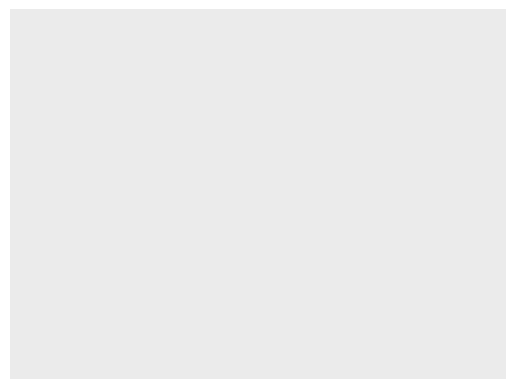

<ggplot: (8792439308049)>

In [105]:
# Crea lienzo en blanco
ggplot(mpg)

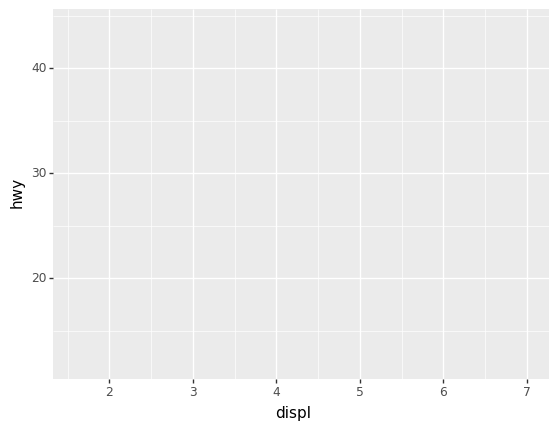

<ggplot: (8792439324037)>

In [107]:
# Crea lienzo 
# y especifica cómo deseamos asignar variables a atributos eestéticos
ggplot(mpg) + aes(x="displ", y="hwy")

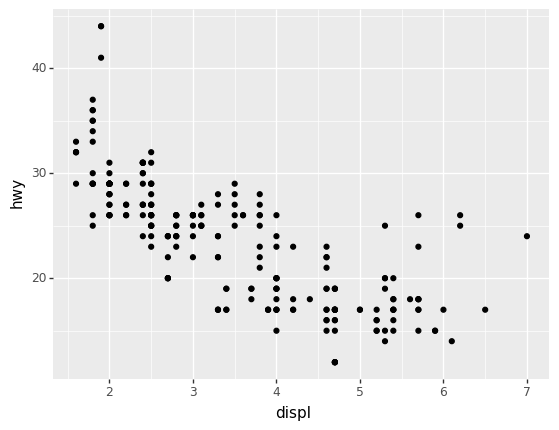

<ggplot: (8792445266285)>

In [112]:
# Crea lienzo, 
# especifica cómo deseamos asignar variables a atributos eestéticos
# y agrega nueva capa de 
ggplot(mpg) + aes(x="displ", y="hwy") + geom_point()

## Datos

Consideremos un conjunto de datos de dominio público [mpg](https://ggplot2.tidyverse.org/reference/mpg.html) que contiene aproximadamente 230 observaciones extraídas de la base de datos de la economía de combustible que la EPA pone a disposición en [https://fueleconomy.gov/](https://fueleconomy.gov/). Contiene solo modelos que tuvieron un nuevo lanzamiento cada año entre 1999 y 2008; esto se usó como un indicador de la popularidad del automóvil.

In [86]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   manufacturer  234 non-null    category
 1   model         234 non-null    category
 2   displ         234 non-null    float64 
 3   year          234 non-null    int64   
 4   cyl           234 non-null    int64   
 5   trans         234 non-null    category
 6   drv           234 non-null    category
 7   cty           234 non-null    int64   
 8   hwy           234 non-null    int64   
 9   fl            234 non-null    category
 10  class         234 non-null    category
dtypes: category(6), float64(1), int64(4)
memory usage: 13.7 KB


In [87]:
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


## Estética

Después de especificar los datos que deseamos visualizar, el siguiente paso es definir la variable que deseamos usar para cada atributo estético del gráfico. 

La estética (o `aesthetics`) asigna variables de datos a atributos gráficos, como posición 2D, color, tipo de línea, tamaño, figura de los puntos, entreo otros.

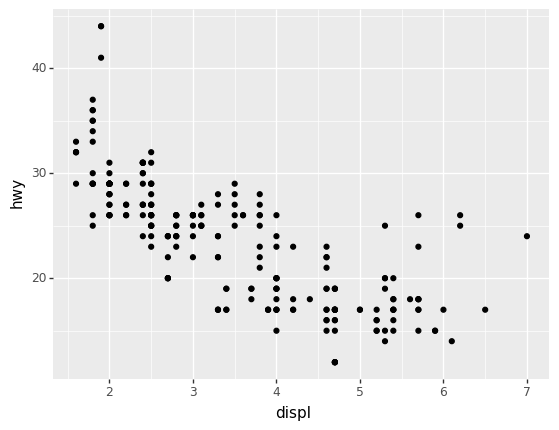

<ggplot: (8792437412785)>

In [89]:
# Crea un gráfico de puntos que muestra 
# el tamaño de motor en el eje x
# y el consumo de combustible en carretera en el eje y
ggplot(mpg) + aes(x="displ", y="hwy") + geom_point()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


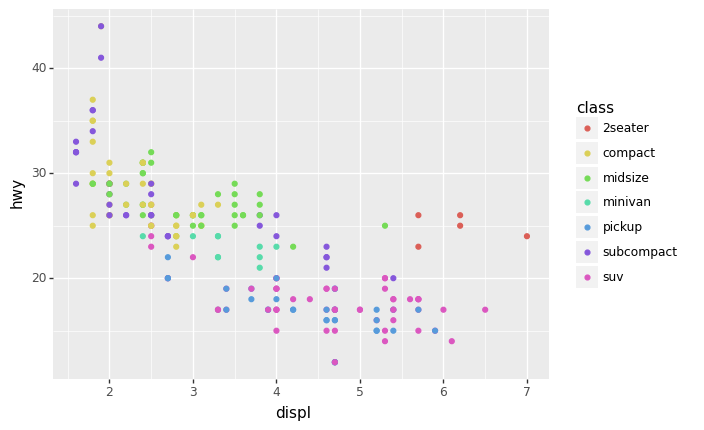

<ggplot: (8792437139809)>

In [325]:
# Crea un gráfico de puntos que muestra 
# el tamaño de motor en el eje x,
# el consumo de combustible en carretera en el eje y
# y el fabricante en el color de los puntos
ggplot(mpg) + aes(x="displ", y="hwy", color="class") + geom_point()

## Objetos geométricos (y transformaciones estadísticas)

Después de definir los atributos gráficos que deseamos utilizar, debemos especificar uno o varios objetos geométricos para indicar deben dibujarse los puntos de datos. Igualmente, es posible especificar objetos primitivos, es decir, objetos geométricos independientes de los datos. 

Los objetos geométricos (o `geoms`) pueden ser puntos, líneas, barras, polígonos, áreas, histogramas, rectas con el mejor ajuste, entre otros. Cuál utilizar [dependerá del total y tipo de variables de datos que querramos representar y qué mensaje querramos comunicar con la visualización](https://github.com/sarahiaguilar/fundamentos-cdd/blob/main/cheatsheets/ggplot2.pdf). 

Se pueden apilar tantos objetos geométricos como se requiera. 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


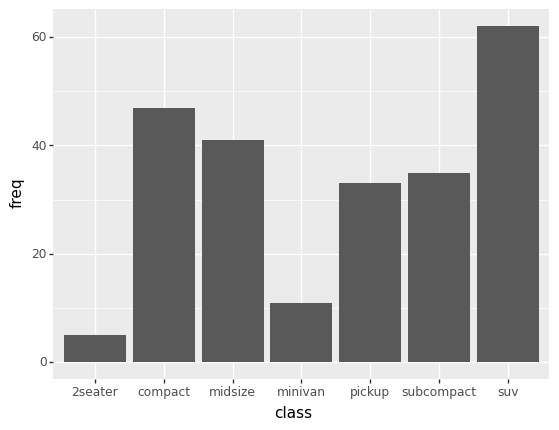

<ggplot: (8792445168377)>

In [160]:
# Crea un gráfico de barras que muestra 
# la clase en el eje x y en el color de las barras
# y la frecuencia de cada una en el eje y 
class_freq = pd.DataFrame(mpg.groupby(["class"]).size().reset_index())
class_freq.columns = ["class", "freq"]
ggplot(class_freq) + aes(x="class", y="freq") + geom_col()

Las transformaciones estadísticas aplican cálculos y agregaciones a los datos antes de graficarlos. `plotnine` incluye varias transformaciones estadísticas que puede utilizar y muchos de los `geoms` hacen uso de ellas de forma implícita. 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


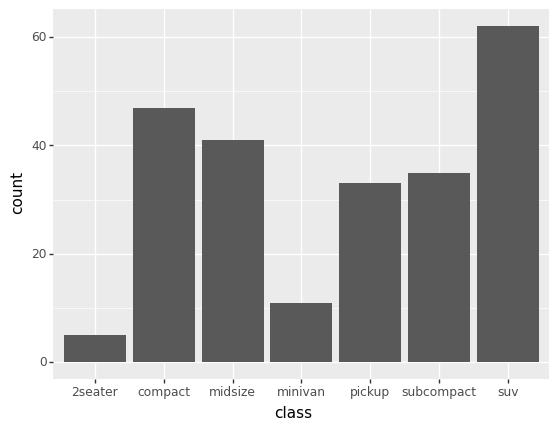

<ggplot: (8792437297557)>

In [92]:
# Crea un gráfico de barras que muestra 
# la clase en el eje x y en el color de las barras
# y la frecuencia de cada una en el eje y 
ggplot(mpg) + aes(x="class") + geom_bar(stat="count")

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


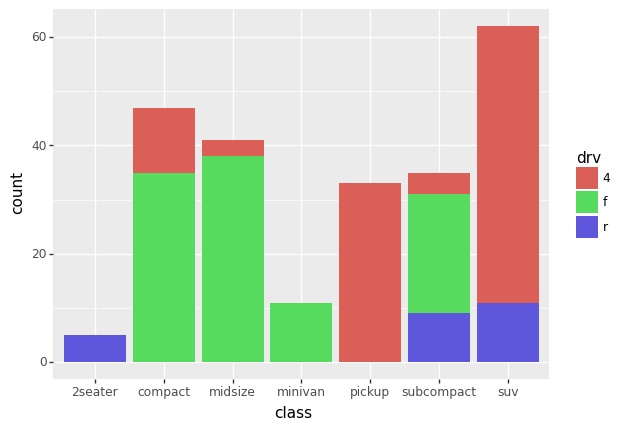

<ggplot: (8792442480345)>

In [104]:
# Crea un gráfico de barras que muestra 
# la clase en el eje x y en el color de las barras
# y la frecuencia de cada una en el eje y 
ggplot(mpg) + aes(x="class", fill="drv") + geom_bar(stat="count")

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


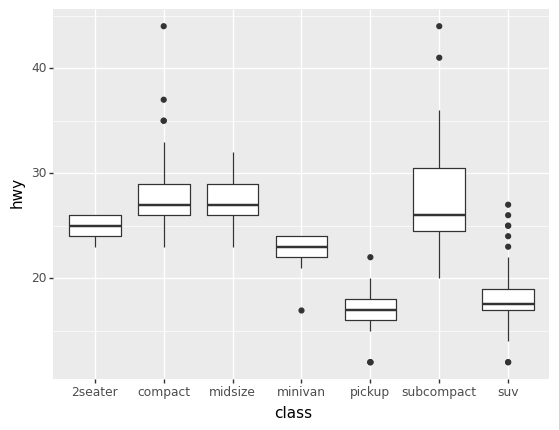

<ggplot: (8792437384281)>

In [94]:
# Crea un gráfico de cajas que muestra 
# la clase en el eje x 
# y el consumo de combustible en carretera en el eje y 
ggplot(mpg) + aes(x="class", y="hwy") + geom_boxplot()

Sobre los gráficos de caja en `ggplot2` (y por ende, en `plotnine`): 
* Cuartiles (25, 50, 75 percentiles), 50% es la mediana.
* El rango intercuartílico es la diferencia entre los percentiles 75 y 25.
* El bigote superior es el valor máximo de los datos que está dentro de 1.5 veces el rango intercuartílico sobre el percentil 75.
* El bigote inferior es el valor mínimo de los datos que está dentro de 1.5 veces el rango intercuartil por debajo del percentil 25.
* Los valores atípicos se consideran cualquier valor superior a 1.5 veces el rango intercuartílico sobre el percentil 75 o cualquier valor inferior a 1.5 veces el rango intercuartílico bajo el percentil 25.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(data['x']):


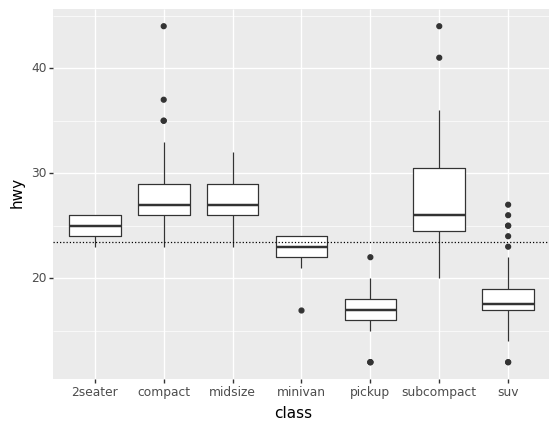

<ggplot: (8792441979861)>

In [95]:
# Crea un gráfico de cajas que muestra 
# la clase en el eje x,
# el consumo de combustible en carretera en el eje y 
# y la media el consumo de combustible en carretera como una línea horizontal punteada
mu = mpg.hwy.mean()
(
    ggplot(mpg) 
    + aes(x="class", y="hwy") 
    + geom_boxplot() 
    + geom_hline(yintercept=mu, linetype="dotted")
)

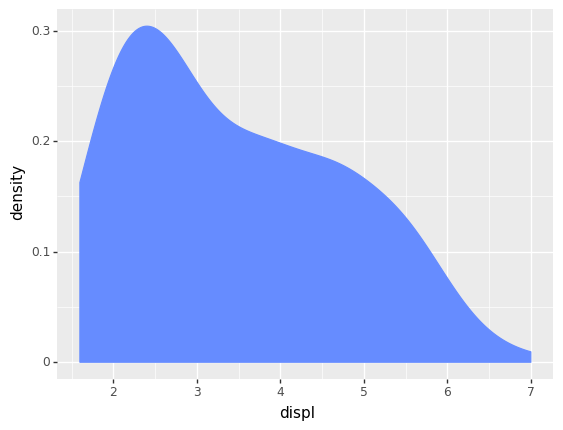

<ggplot: (8792442133993)>

In [114]:
# Crea un gráfico con la estimación de la densidad kernel para el tamaño de motor
ggplot(mpg) + aes(x="displ") + stat_density(color="#668cff", fill="#668cff")

### Escalas

Cada vez que especificamos un mapeo estético, `plotnine` usa una escala particular para determinar el rango de valores al que se deben asignar los datos. Por lo tanto, cuando especificamos: 

`ggplot(mpg) + aes(x="cty", y="hwy", color="class") + geom_point()`

`plotnine` agrega automáticamente una escala para cada mapeo al gráfico:

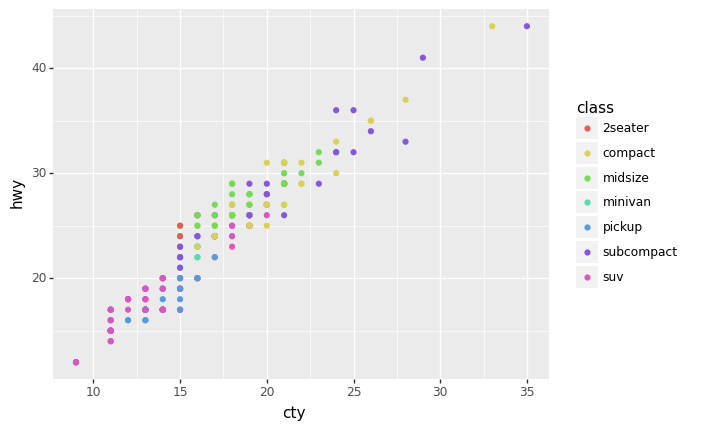

<ggplot: (8792441710421)>

In [124]:
# Crea un gráfico de puntos que muestra 
# el número de cilindros en el eje x
# y el consumo de combustible en carretera en el eje y
(
    ggplot(mpg) 
    + aes(x="cty", y="hwy", color="class")
    + geom_point()
    + scale_x_continuous() 
    + scale_y_continuous()
    + scale_colour_discrete()
)

Cada escala se puede representar mediante una función con el siguiente nombre: `scale_`, seguido del nombre del atributo estética, seguido de un `_` y el tipo de dato de la variable de la escala.

Si bien las escalas predeterminadas funcionan bien, es posible agregar explícitamente diferentes escalas para reemplazar las predeterminadas. 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


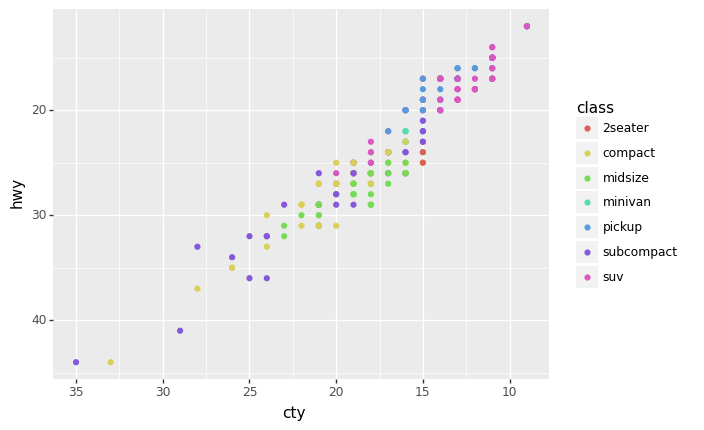

<ggplot: (8792437257697)>

In [127]:
# Crea un gráfico de puntos que muestra 
# el número de cilindros en el eje x
# y el consumo de combustible en carretera en el eje y
(
    ggplot(mpg) 
    + aes(x="cty", y="hwy", color="class")
    + geom_point()
    + scale_x_reverse()
    + scale_y_reverse()
)

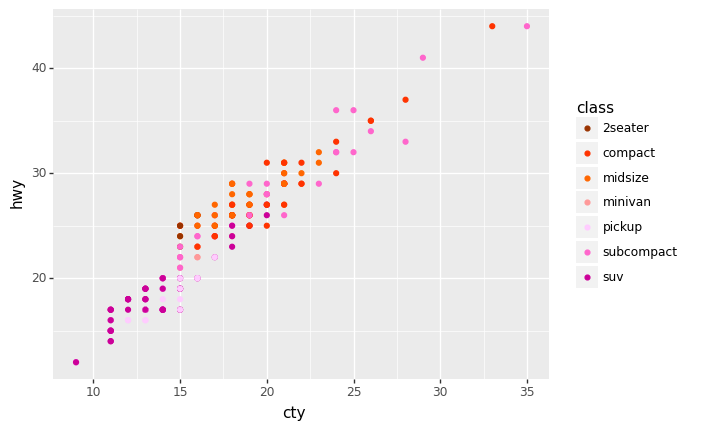

<ggplot: (8792439226785)>

In [171]:
# Crea un gráfico de puntos que muestra 
# el número de cilindros en el eje x
# y el consumo de combustible en carretera en el eje y
(
    ggplot(mpg) 
    + aes(x="cty", y="hwy", color="class")
    + geom_point()
    + scale_color_manual(values=["#993300", "#ff3300", "#ff6600", "#ff9999", "#ffccff", "#ff66cc", "#cc0099"])
)

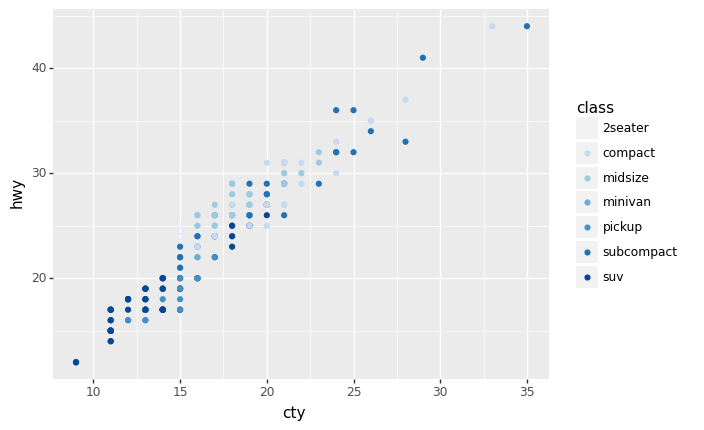

<ggplot: (8792442072189)>

In [173]:
# Crea un gráfico de puntos que muestra 
# el número de cilindros en el eje x
# y el consumo de combustible en carretera en el eje y
(
    ggplot(mpg) 
    + aes(x="cty", y="hwy", color="class")
    + geom_point()
    + scale_color_brewer(palette="Blues") # https://rdrr.io/cran/RColorBrewer/man/ColorBrewer.html
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


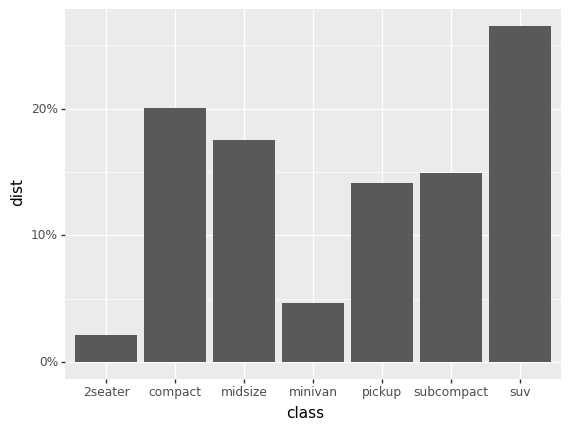

<ggplot: (8792439698265)>

In [169]:
# Crea un gráfico de barras que muestra 
# la clase en el eje x y en el color de las barras
# y la distribución de cada una en el eje y 
class_freq["dist"] = class_freq.freq/len(mpg)
(
    ggplot(class_freq) + 
      aes(x="class", y="dist") + 
      geom_col() +
      scale_y_continuous(labels=lambda lab: ["%d%%" % (v * 100) for v in lab])
)

## Facetas

Las facetas (o `facets`) nos permiten agrupar datos por variables y luego graficar cada grupo individualmente un panel independiente, pero en el mismo gráfico (imagen). Esto es particularmente útil cuando queremos mostrar más de dos variables en el mismo gráfico.

Cuando nos encontremos con esta necesidad, podemos seguir los siguientes dos pasos:
1. Dividir los datos en grupos donde todos los puntos de datos de un grupo comparten los mismos valores para algunas variables.
2. Graficar cada grupo individualmente, mostrando solo las variables que no se usan en la agrupación.

/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  margin_vars = [list(data.columns & self.rows),
/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  list(data.columns & self.cols)]


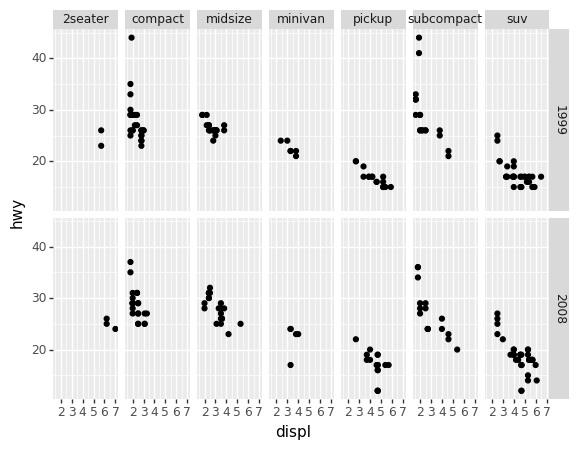

<ggplot: (8792439513761)>

In [96]:
# Crea un gráfico con facetas por clase y año que muestra 
# el tamaño de motor en el eje x
# y el consumo de combustible en carretera en el eje y 
(
    ggplot(mpg)
    + aes(x="displ", y="hwy")
    + geom_point()
    + facet_grid(facets="year~class")
)

## Coordenadas

El sistema de coordenadas define cómo se asignan los puntos de datos a ubicaciones gráficas 2D en el plano. Elegir el sistema de coordenadas correcto puede mejorar considerablemente la legibilidad de las visualizaciones de datos.

Al igual que con las escalas, los sistemas de coordenadas se especifican con funciones que comienzan con `coord_` y se agregan como una capa. 

Existe una serie de diferentes sistemas de coordenadas, que incluye:
* `coord_cartesian()` es el sistema de coordenadas cartesianas predeterminado, donde especifica los valores x y y. Este sistema de coordenadas es el predeterminado, por lo que no es necesario agregarlo en cada ocasión como capa. No obstante, especificar sus parámetros permite establecer límites en los ejes, y por tanto, acercar o alejar la gráfica. 
* `coord_flip()` es un sistema de coordenadas cartesianas con la x y la y volteadas.
* `coord_polar()` es un sistema de coordenadas polares.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


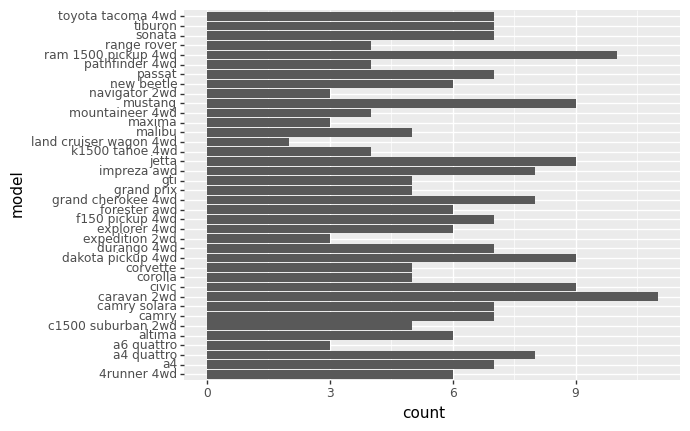

<ggplot: (8792439480269)>

In [103]:
# Crea un gráfico de barras que muestra 
# el modelo en el eje x 
# y la frecuencia de cada una en el eje y 
# con el sistema de coordenadas volteado
ggplot(mpg) + aes(x="model") + geom_bar() + coord_flip()

## Temas

Otra excelente manera de mejorar la presentación de sus visualizaciones de datos es elegir un tema no predeterminado para que sus gráficos se destaquen, haciéndolos más hermosos y vibrantes. `plotnine` incluye [varios temas entre los que podemos elegir](https://ggplot2.tidyverse.org/reference/ggtheme.html).

/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:136: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  margin_vars = [list(data.columns & self.rows),
/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet_grid.py:137: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  list(data.columns & self.cols)]


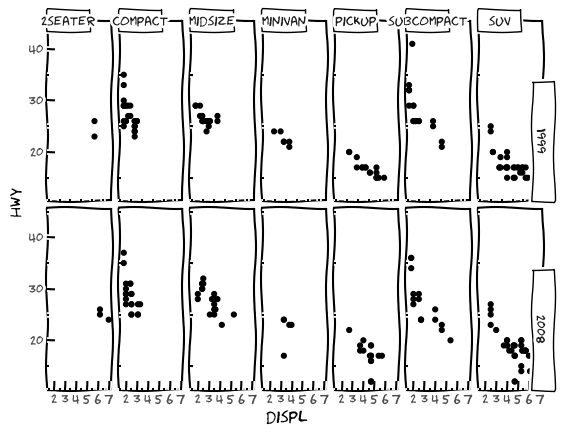

<ggplot: (8792439910885)>

In [238]:
# Crea un gráfico con facetas por clase y año que muestra 
# el tamaño de motor en el eje x
# y el consumo de combustible en carretera en el eje y 
(
    ggplot(mpg) +
      aes(x="displ", y="hwy") +
      geom_point() +
      facet_grid(facets="year~class") +
      theme_xkcd()
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


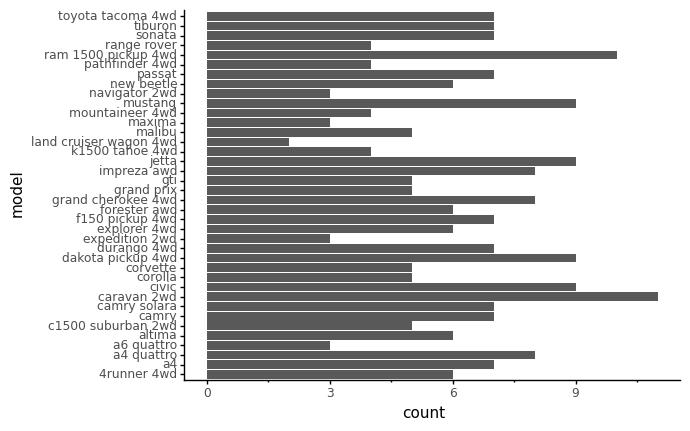

<ggplot: (8792442213241)>

In [236]:
# Crea un gráfico de barras que muestra 
# el modelo en el eje x 
# y la frecuencia de cada una en el eje y 
# con el sistema de coordenadas volteado
ggplot(mpg) + aes(x="model") + geom_bar() + coord_flip() + theme_classic()

In [ ]:
# Crea un gráfico de barras que muestra 
# el modelo en el eje x 
# y la frecuencia de cada una en el eje y 
# con el sistema de coordenadas volteado
ggplot(mpg) + aes(x="model") + geom_bar() + coord_flip() + theme_minimal()

## Títulos, etiquetas y anotaciones

Los títulos, etiquetas y anotaciones textuales (en el lienzo, los ejes, la geometría y la leyenda) son una parte importante para hacer que un gráfico sea comprensible y que comunique información de manera eficiente. Aunque no es una parte explícita de la gramática de gráficos, se consideraría una forma de geometría. 

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


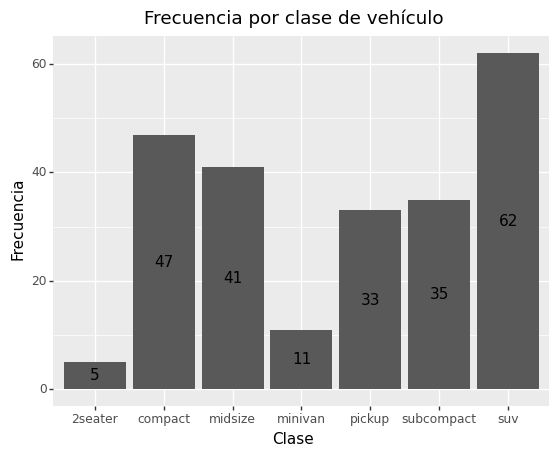

<ggplot: (8792439914253)>

In [230]:
# Crea un gráfico de barras que muestra 
# la clase en el eje x y en el color de las barras
# y la frecuencia de cada una en el eje y 
(
    ggplot(class_freq) + 
      aes(x="class", y="freq", label="freq") + 
      geom_col() + 
      geom_text(position = position_stack(vjust = 0.5)) + 
      labs(x="Clase", 
           y="Frecuencia", 
           title="Frecuencia por clase de vehículo")
)

## Los últimos detalles y exportación

Una vez que el gráfico esté listo, este se puede exportar con la función `save()`. 

A pesar de que `plotnine` es una herramienta de visualización de datos robusta, no se tiene un control absoluto de todos los elementos gráficos. Por ello, es recomendable importar el gráfico como `svg`, un formato de archivo vectorial, que después es posible cargar en herramientas de diseño gráfico alternas para terminar de ajustar los mínimos detalles. 

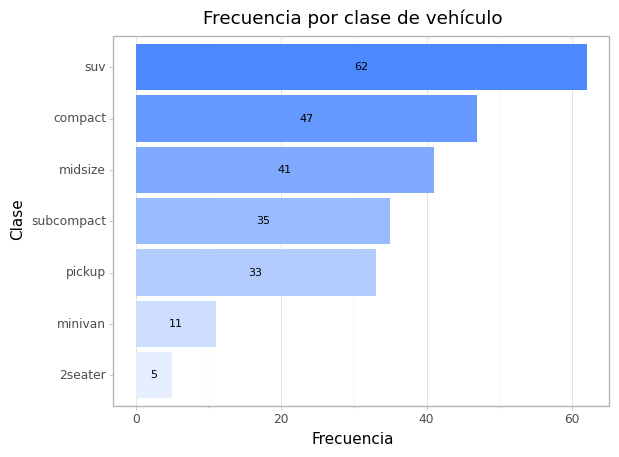

<ggplot: (8792441965289)>

In [318]:
# Crea un gráfico de barras que muestra 
# la clase en el eje x y en el color de las barras
# y la frecuencia de cada una en el eje y 
p = (
      ggplot(class_freq) + 
        aes(x="class", y="freq", label="freq", fill="class") + 
        geom_col() + 
        geom_text(position = position_stack(vjust = 0.5), size=8) +
        scale_x_discrete(limits=class_freq.sort_values(by="freq")["class"].tolist()) +
        scale_fill_manual(values=["#e6eeff", "#6699ff", "#80aaff", "#ccddff", "#b3ccff", "#99bbff", "#4d88ff"], guide=False) +
        coord_flip() +
        labs(x="Clase", 
            y="Frecuencia", 
            title="Frecuencia por clase de vehículo") +
        theme_light() +
        theme(panel_grid_minor_y=element_blank(),
              panel_grid_major_y=element_blank())
    )
p

In [322]:
# Exporta gráfico como svg
p.save("./myplot.svg")

/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./myplot.svg
  warn('Filename: {}'.format(filename), PlotnineWarning)


## Ejercicio

Contexto:
* Audiencia específica: Estudiantes de primer semestre de ingeniería mecánica. 
* Lo que necesitan saber o hacer: Comprender cuál es la relación entre el tamaño de motor, el consumo de combustible y de número de cilindros de los vehículos con modelos que tuvieron un nuevo lanzamiento cada año entre 1999 y 2008. 
* Los datos que usaremos para ilustrar nuestro caso: Conjunto de datos de dominio público mpg que contiene aproximadamente 230 observaciones extraídas de la base de datos de la economía de combustible que la EPA pone a disposición en https://fueleconomy.gov/.

Utilizando el contexto dado y los fundamentos de la visualización de datos (vistos en clase), construye con `plotnine` una visualización de datos adecuada. 